In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
database = pd.read_csv('database.csv')
database.head(100)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,79,oral_cavity_cancer,12.259970,7.822784,7.076852,9.932529,6.079321,8.884615,7.078590,6.375017,...,14.097388,13.808292,14.879530,14.770789,6.277723,5.492216,4.872947,4.504117,5.058785,4.959956
1,80,oral_cavity_cancer,12.089249,7.754616,7.640473,10.528756,5.600609,9.038594,7.191701,6.505015,...,14.150997,13.975202,14.868461,14.710410,6.056832,5.809288,4.551575,4.536802,5.166772,5.218432
2,81,oral_cavity_cancer,12.253493,8.331198,6.980443,9.786068,5.357674,7.671959,6.878982,6.686758,...,13.171790,12.663488,14.375815,14.229668,5.902731,5.552099,4.660518,4.428401,4.990019,4.845970
3,82,oral_cavity_cancer,12.784522,8.175401,7.303593,9.868314,5.524533,7.802572,6.849571,6.628684,...,13.348310,12.854595,14.562390,14.354983,5.964846,5.588120,4.667251,4.555028,5.090857,4.773182
4,83,oral_cavity_cancer,12.594939,7.766172,8.706035,9.887563,5.529864,8.735436,6.943179,6.550663,...,13.820435,13.565086,14.817541,14.686170,5.594160,5.640937,4.492807,4.503870,4.920595,4.946553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,157,normal,12.156213,7.811862,7.289605,9.978889,5.296831,8.236728,6.613593,6.639674,...,12.440982,11.907141,13.739013,13.491833,5.666137,5.465851,4.591880,4.496292,4.667147,4.823525
96,159,normal,11.968282,8.101490,7.669970,10.031279,5.224305,8.385825,6.596375,6.483935,...,12.878455,12.489872,14.099607,13.812158,5.672735,5.482194,4.724422,4.496517,4.925655,4.922819
97,161,normal,11.784435,8.056824,6.830364,9.799586,5.044246,8.417915,6.422386,6.409172,...,12.331151,11.858065,13.783795,13.478364,5.452991,5.392892,4.563032,4.361904,4.803937,4.720763
98,163,normal,12.328770,8.274124,7.443384,9.955389,4.996933,8.802071,6.575399,6.731443,...,12.761132,12.493932,14.047933,13.832834,5.638318,5.426413,4.561221,4.286313,4.826192,4.797658


(array([74.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

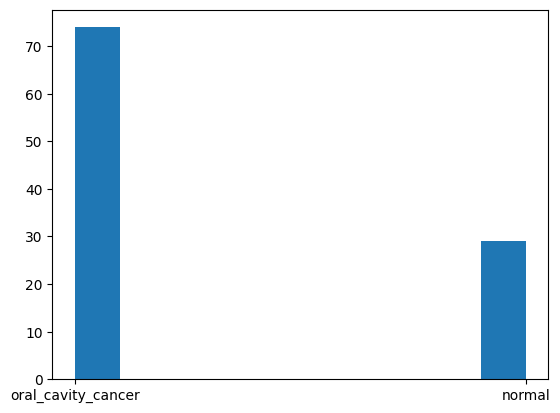

In [3]:
# visualizar a distribuição dos dados
plt.hist(database['type'], bins=10)

In [4]:
# separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(database.drop(['type','samples'], axis=1), database['type'], test_size=0.30, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 54675), (31, 54675), (72,), (31,))

In [6]:
y_train.value_counts(), y_test.value_counts()

(oral_cavity_cancer    51
 normal                21
 Name: type, dtype: int64,
 oral_cavity_cancer    23
 normal                 8
 Name: type, dtype: int64)

# Aprendizagem de Máquina - Árvores de Decisão

In [7]:
# treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# encontrar quais são as features mais importantes e organizar em ordem decrescente
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

for i in range(X_train.shape[1]):
    print(f"{i+1} {feature_names[indices[i]]} {importances[indices[i]]}")


1 209875_s_at 0.016000658327847268
2 229865_at 0.015930605564648113
3 209368_at 0.013516215881305395
4 208850_s_at 0.012389758455113732
5 1552365_at 0.010454085855640626
6 206605_at 0.009298245614035089
7 210776_x_at 0.008772378516624041
8 41644_at 0.008519191283708429
9 239262_at 0.008358662613981764
10 226777_at 0.008358662613981764
11 232484_at 0.008269294812495555
12 220149_at 0.008235294117647058
13 219557_s_at 0.00811886936592819
14 204393_s_at 0.008068519715578539
15 208908_s_at 0.008068519715578539
16 235095_at 0.007947699437272426
17 1555817_s_at 0.007947699437272426
18 225276_at 0.007887013939838592
19 1570596_at 0.007875222816399286
20 222449_at 0.00782312925170068
21 220289_s_at 0.007809330628803245
22 205463_s_at 0.007692307692307692
23 208660_at 0.00758770588980934
24 218364_at 0.007285067873303166
25 218756_s_at 0.007259259259259259
26 230670_at 0.007256515775034294
27 231840_x_at 0.007244147157190636
28 204817_at 0.007169811320754718
29 223158_s_at 0.007156979038577025


In [9]:
# prever os dados de teste
y_pred = rf.predict(X_test)

# avaliar o modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8709677419354839

<Axes: >

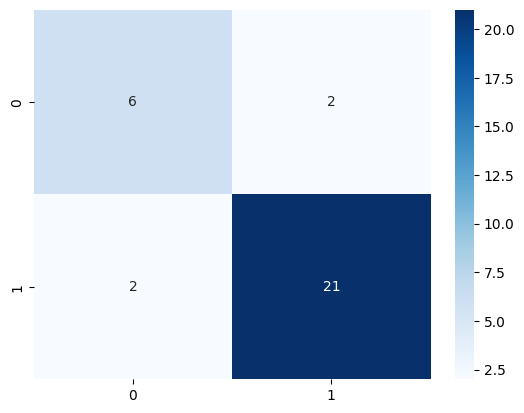

In [10]:
# visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<Axes: >

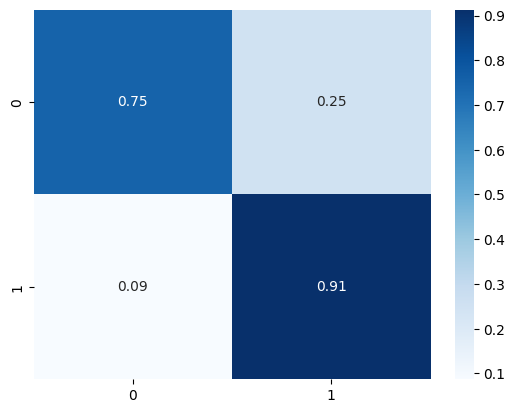

In [11]:
# visualizar a matriz de confusão normalizada
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')

In [12]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


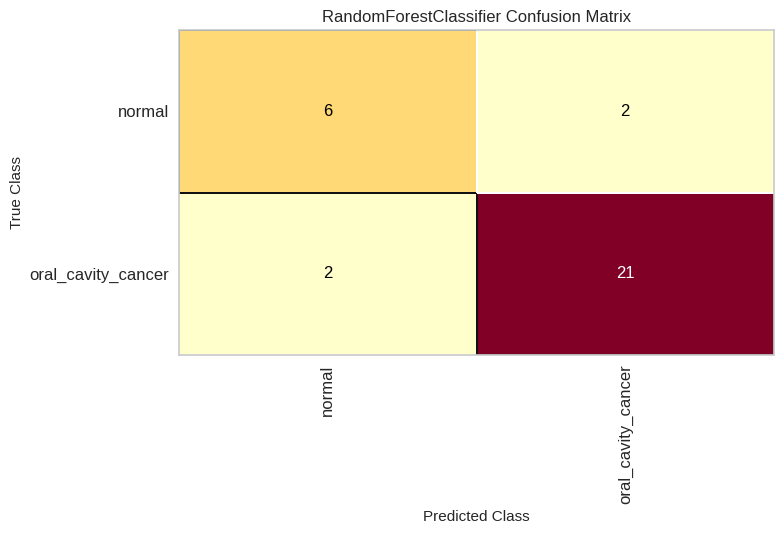

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
# matriz de confusao com yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()


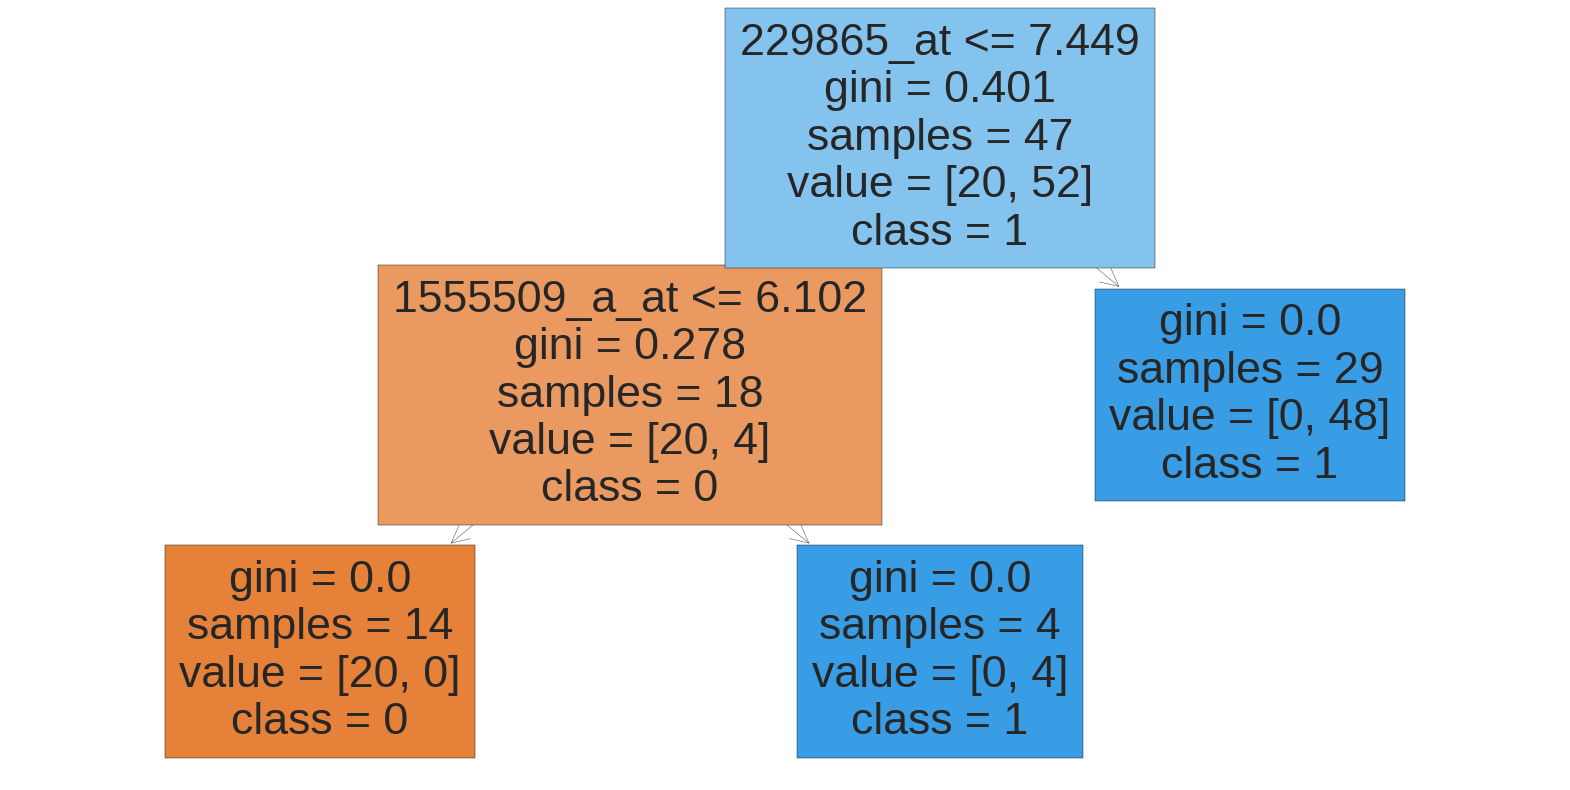

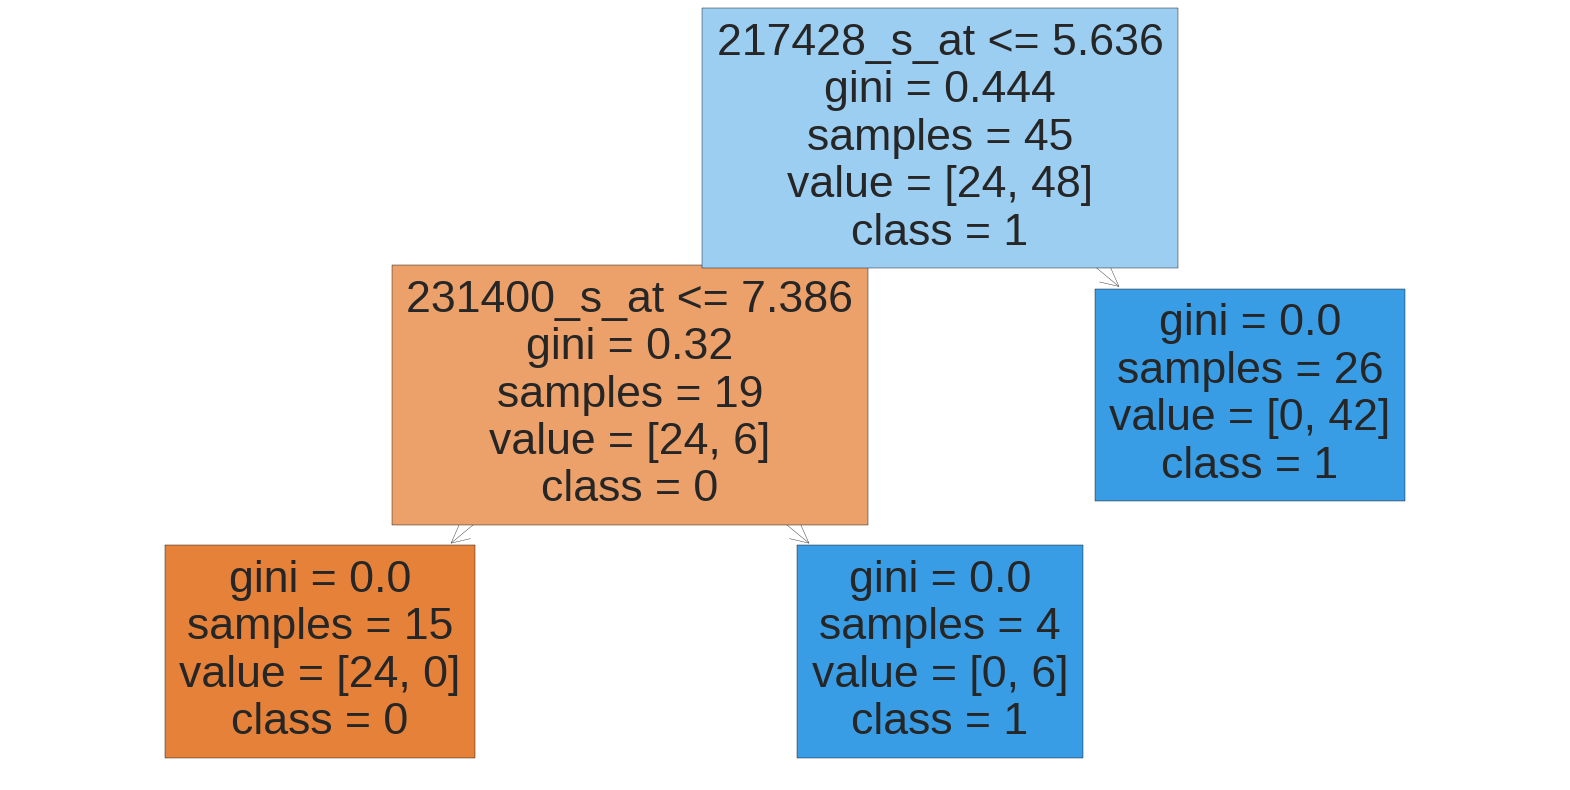

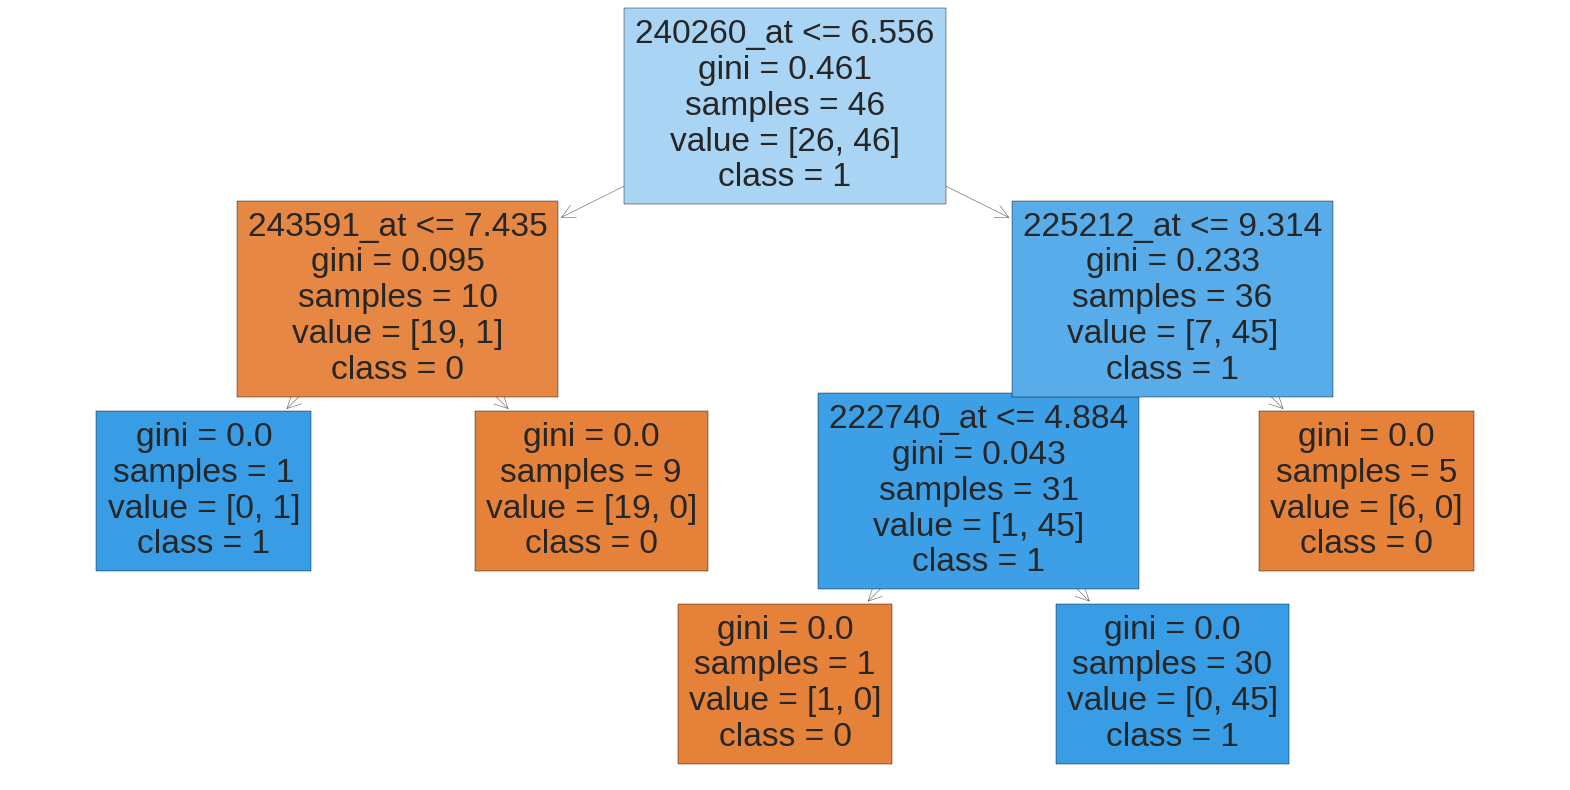

In [14]:
# plot the trees in the forest
from sklearn.tree import plot_tree
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf.estimators_[i], feature_names=feature_names, class_names=['0','1'], filled=True)
    plt.show()